### EE 421/521 Image Processing - Spring 2021-22

## Subject 4 - Frequency Domain Filtering of Images

In this lecture, you will learn the following:

1. 1-D Discrete Fourier Transform
2. 2-D Discrete Fourier Transform
3. 2-D Discrete Fourier Transform of Images
4. 1-D Convolution Theorem
5. 2-D Filtering of Images in the Fourier Domain

*Copyright (c) 2020-2022 by Arif Tanju Erdem*

In [2]:
# STEP 0 Import the necessary packages

# reading/writing image files
from skimage import io
from skimage import color

# displaying images and plots
import matplotlib.pyplot as plt

# array operations
import numpy as np

# signal processing operations
from scipy import signal
from scipy.linalg import circulant

# DFT calculations
from scipy import fftpack as ft

# mathematical calculations
import math
import cmath


---------------------------------------------------------------
### **Part 1:** 1-D Discrete Fourier Transform

#### Forward Transform (DFT) - Analysis Equation
\begin{equation}
X(u) = \sum_{m}x(m)e^{-j2\pi\frac{um}{M}}
\end{equation}

#### Inverse Transform (IDFT) - Synthesis Equation
\begin{equation}
x(m) = \frac{1}{M}\sum_{u}X(u)e^{j2\pi\frac{um}{M}}
\end{equation}

In [3]:
# my function to construct a DFT matrix of a given size

def my_DFT1D_matrix(M):
    
    # DFT matrix
    W = np.zeros((M,M), dtype=complex)
    
    # define the imaginary constant in the power of complex exponential
    j2pi = -2j * math.pi

    for u in range(M):
        for m in range(M):
            W[u,m] = cmath.exp(j2pi*u*m/M)
            
    return W
        
# end of function          

In [4]:
# STEP 1.1 Construct Discrete Fourier Transform matrix 

# construct the DFT matrix for a given size
M = 6
W = my_DFT1D_matrix(M)

# obtain an easy-print version of the DFT matrix
W_p = np.array2string(W, precision=1, separator=' ', suppress_small=True)

# real part of the DFT matrix
W_real_p = np.array2string(W.real, precision=1, separator=' ', suppress_small=True)

# imaginary part of the DFT matrix
W_imag_p = np.array2string(W.imag, precision=1, separator=' ', suppress_small=True)

# print the DFT matrix
print("DFT matrix: \n", W_p)
print("\nDFT matrix Real Part: \n", W_real_p)
print("\nDFT matrix Imaginary Part: \n", W_imag_p)

DFT matrix: 
 [[ 1. +0.j   1. +0.j   1. +0.j   1. +0.j   1. +0.j   1. +0.j ]
 [ 1. +0.j   0.5-0.9j -0.5-0.9j -1. -0.j  -0.5+0.9j  0.5+0.9j]
 [ 1. +0.j  -0.5-0.9j -0.5+0.9j  1. +0.j  -0.5-0.9j -0.5+0.9j]
 [ 1. +0.j  -1. -0.j   1. +0.j  -1. -0.j   1. +0.j  -1. -0.j ]
 [ 1. +0.j  -0.5+0.9j -0.5-0.9j  1. +0.j  -0.5+0.9j -0.5-0.9j]
 [ 1. +0.j   0.5+0.9j -0.5+0.9j -1. -0.j  -0.5-0.9j  0.5-0.9j]]

DFT matrix Real Part: 
 [[ 1.   1.   1.   1.   1.   1. ]
 [ 1.   0.5 -0.5 -1.  -0.5  0.5]
 [ 1.  -0.5 -0.5  1.  -0.5 -0.5]
 [ 1.  -1.   1.  -1.   1.  -1. ]
 [ 1.  -0.5 -0.5  1.  -0.5 -0.5]
 [ 1.   0.5 -0.5 -1.  -0.5  0.5]]

DFT matrix Imaginary Part: 
 [[ 0.   0.   0.   0.   0.   0. ]
 [ 0.  -0.9 -0.9 -0.   0.9  0.9]
 [ 0.  -0.9  0.9  0.  -0.9  0.9]
 [ 0.  -0.   0.  -0.   0.  -0. ]
 [ 0.   0.9 -0.9  0.   0.9 -0.9]
 [ 0.   0.9  0.9 -0.  -0.9 -0.9]]


In [5]:
# STEP 1.2 Discrete Fourier Transform: via matrix multiplication

# 1-D signal
x = np.array([2, 1, 3, -1, 0, -2, 2, 1])

# get the size of x
x_size = x.size

# construct the DFT matrix
W = my_DFT1D_matrix(x_size)

# matrix multiplication of the signal with the DFT matrix
X = np.dot(W,x)

# obtain an easy-print version of the DFT of 1-D signal
X_pr = np.array2string(X.real, formatter={'float_kind':lambda x: " %5.2f" % x})
X_pi = np.array2string(X.imag, formatter={'float_kind':lambda x: " %5.2f" % x})

# print real and imaginary parts of the DFT
print("sum of signal values:", x.sum())
print("\nreal part: \n", X_pr)
print("\nimaginary part: \n", X_pi)

sum of signal values: 6

real part: 
 [  6.00   5.54  -3.00  -1.54   8.00  -1.54  -3.00   5.54]

imaginary part: 
 [  0.00  -1.71   1.00   0.29   0.00  -0.29  -1.00   1.71]


In [6]:
# STEP 1.3 Discrete Fourier Transform: via SciPy's DFT function

# calculate the DFT of the signal
X = ft.fft(x)

# obtain an easy-print version of the DFT 
X_pr = np.array2string(X.real, formatter={'float_kind':lambda x: " %5.2f" % x})
X_pi = np.array2string(X.imag, formatter={'float_kind':lambda x: " %5.2f" % x})

# print real and imaginary parts of the DFT
print("DFT real part: \n", X_pr)
print("\nDFT imaginary part: \n", X_pi)

DFT real part: 
 [  6.00   5.54  -3.00  -1.54   8.00  -1.54  -3.00   5.54]

DFT imaginary part: 
 [ -0.00  -1.71   1.00   0.29  -0.00  -0.29  -1.00   1.71]


In [7]:
# STEP 1.4 Inverse Discrete Fourier Transform: via SciPy's DFT function

# calculate the DFT of the signal
x_ = ft.ifft(X)

# obtain an easy-print version of the IDFT 
x_pr = np.array2string(x_.real, formatter={'float_kind':lambda x: " %5.2f" % x})
x_pi = np.array2string(x_.imag, formatter={'float_kind':lambda x: " %5.2f" % x})

# print real and imaginary parts of the IDFT
print("1-D signal: \n", x)
print("\nIDFT real part: \n", x_pr)
print("\nIDFT imaginary part: \n", x_pi)

1-D signal: 
 [ 2  1  3 -1  0 -2  2  1]

IDFT real part: 
 [  2.00   1.00   3.00  -1.00   0.00  -2.00   2.00   1.00]

IDFT imaginary part: 
 [  0.00   0.00   0.00   0.00   0.00   0.00  -0.00   0.00]


In [8]:
# STEP 1.5 Inverse Discrete Fourier Transform: via matrix multiplication

# calculate the DFT of the signal
# matrix multiplication of the signal with the DFT matrix
x_2 = np.dot(np.conjugate(W),X)/x_size

# obtain an easy-print version of the IDFT 
x_2_pr = np.array2string(x_2.real, formatter={'float_kind':lambda x: " %5.2f" % x})
x_2_pi = np.array2string(x_2.imag, formatter={'float_kind':lambda x: " %5.2f" % x})

# print real and imaginary parts of the IDFT
print("1-D signal: \n", x)
print("\nIDFT real part: \n", x_2_pr)
print("\nIDFT imaginary part: \n", x_2_pi)

1-D signal: 
 [ 2  1  3 -1  0 -2  2  1]

IDFT real part: 
 [  2.00   1.00   3.00  -1.00  -0.00  -2.00   2.00   1.00]

IDFT imaginary part: 
 [  0.00   0.00  -0.00   0.00   0.00   0.00  -0.00  -0.00]


---------------------------------------------------------------
### **Part 2:** 2-D Discrete Fourier Transform

#### Forward Transform (DFT) - Analysis Equation
\begin{equation}
F(u,v) = \sum_{m}\sum_{n}x(m,n)e^{-j2\pi(\frac{um}{M} + \frac{vn}{N})}
\end{equation}

#### Inverse Transform (IDFT) - Synthesis Equation
\begin{equation}
x(m,n) = \frac{1}{MN}\sum_{u}\sum_{v}F(u,v)e^{j2\pi(\frac{um}{M} + \frac{vn}{N})}
\end{equation}

In [9]:
# my function to set P to 0 if M infinitesmall
# (e.g., for setting phase to 0 when magnitude is infinitesmall)

def my_epsilon2zero(P, M):
    
    epsilon = 1.0e-6
    
    shapeP = P.shape
    shapeM = M.shape
    assert shapeP == shapeM
    
    P = P.reshape(-1)
    M = M.reshape(-1)

    for i in range(P.size):
        if M[i] < epsilon:
            P[i] = 0.0
            
    return P.reshape(shapeP)

# end of function

In [10]:
# STEP 3.1 2-D DFT: via matrix multiplication

# 2-D signal (image)
X = np.array([[2, 1, 2, 3, 0],
              [1, 3, 2, 1, 1],
              [2, 3, 0, 1, 2],
              [0, 1, 3, 2, 1]])

# get the size of X
X_size_y, X_size_x = X.shape

# obtain the DFT matrix for the rows
W_x = my_DFT1D_matrix(X_size_x)

# obtain the DFT matrix for the columns
W_y = my_DFT1D_matrix(X_size_y)

# calculate 2-D DFT via matrix multiplication
# (first part takes the DFT of the columns, second part takes the DFT of the rows)
F = np.dot(np.dot(W_y,X), W_x)

# obtain an easy-print version of the DFT
F_pr = np.array2string(F.real, formatter={'float_kind':lambda x: "%5.2f" % x})
F_pi = np.array2string(F.imag, formatter={'float_kind':lambda x: "%5.2f" % x})

# print real and imaginary parts of the DFT
print("sum of signal values:", X.sum())
print("\nreal part: \n", F_pr)
print("\nimaginary part: \n", F_pi)

sum of signal values: 31

real part: 
 [[31.00 -2.62 -0.38 -0.38 -2.62]
 [-0.00 -6.37  3.30  5.65 -2.57]
 [ 1.00  4.62  2.38  2.38  4.62]
 [ 0.00 -2.57  5.65  3.30 -6.37]]

imaginary part: 
 [[ 0.00 -3.80 -2.35  2.35  3.80]
 [-1.00 -3.24  1.24  1.24 -3.24]
 [-0.00  2.35 -3.80  3.80 -2.35]
 [ 1.00  3.24 -1.24 -1.24  3.24]]


In [11]:
# STEP 3.2 2-D DFT: via SciPy's DFT function

# calculate the DFT of the signal
F = ft.fft2(X)

# obtain an easy-print version of the DFT
F_pr = np.array2string(F.real, formatter={'float_kind':lambda x: "%5.2f" % x})
F_pi = np.array2string(F.imag, formatter={'float_kind':lambda x: "%5.2f" % x})

# print real and imaginary parts of the DFT
print("real part: \n", F_pr)
print("\nimaginary part: \n", F_pi)

real part: 
 [[31.00 -2.62 -0.38 -0.38 -2.62]
 [ 0.00 -6.37  3.30  5.65 -2.57]
 [ 1.00  4.62  2.38  2.38  4.62]
 [ 0.00 -2.57  5.65  3.30 -6.37]]

imaginary part: 
 [[-0.00 -3.80 -2.35  2.35  3.80]
 [-1.00 -3.24  1.24  1.24 -3.24]
 [-0.00  2.35 -3.80  3.80 -2.35]
 [ 1.00  3.24 -1.24 -1.24  3.24]]


In [12]:
# STEP 3.3 Inverse DFT (IDFT): via SciPy's IDFT function

# IDFT via IDFT function
X_ = ft.ifft2(F)
X_real = X_.real
X_imag = X_.imag
# make sure that the imaginary part is zero (this must be the case since the signal is real)
assert max(abs(X_.imag.reshape(-1))) < 1.0e-6

# obtain an easy-print version of the IDFT
X_p_signal = np.array2string(X, formatter={'float_kind':lambda x: "%5.2f" % x})
X_p_idft = np.array2string(X_.real, formatter={'float_kind':lambda x: "%5.2f" % x})

# print real and imaginary parts of the DFT
print("2-D Signal: \n", X_p_signal)
print("\n2-D IDFT: \n", X_p_idft)

2-D Signal: 
 [[2 1 2 3 0]
 [1 3 2 1 1]
 [2 3 0 1 2]
 [0 1 3 2 1]]

2-D IDFT: 
 [[ 2.00  1.00  2.00  3.00  0.00]
 [ 1.00  3.00  2.00  1.00  1.00]
 [ 2.00  3.00 -0.00  1.00  2.00]
 [ 0.00  1.00  3.00  2.00  1.00]]


---------------------------------------------------------------
### **Part 3:** 2-D Discrete Fourier Transform of Images

In [13]:
# my function to obtain a display-friendly version of 2-D DFT of an image
# (used for displaying DFT magnitude, DFT real part, and DFT imaginary part)

def my_log_display(X_orig):
    
    X = X_orig.copy()
    
    shapeX = X.shape
    X = X.reshape(-1)

    for i in range(X.size):
        if X[i] < 0:
            # this is needed for real and imaginary parts
            X[i] = - np.log(1-X[i])
        else:
            # magnitude is always non-negative
            X[i] = np.log(1+X[i])
            
    return X.reshape(shapeX)

# end of function  

In [14]:
# my function to multiply an image with (-1)^(i+j) 
# so that the origin of its DFT is displayed at the center

def my_img_shift(img):
    
    height, width = img.shape
    assert height%2 == 0 and width%2 == 0
    
    img_shift = img.copy() + 0.0

    for i in range(height):
        for j in range(width):
            if (i+j)%2 == 1:
                img_shift[i,j] *= -1.0
                
    return img_shift

# end of function

In [15]:
# my function to round image data to nearest integer, then
# truncate to range [0, 255], and then set data type to uint8

def my_imgTruncate(img):
    
    img = np.round(img, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')
    
    return img

# end of function

In [16]:
# my function to convert to lumincance, round to nearest integer, 
# truncate to range [0, 255], and then set data

def my_imgLuminance(imgRGB):
    
    # make sure it is a color image
    dim_img = imgRGB.shape[2]    
    assert dim_img >= 3
    
    # get the luminance data
    if dim_img == 3:
        imgLum = color.rgb2gray(imgRGB)
    else:
        # ignore the alpha channel
        imgLum = color.rgb2gray(imgRGB[:,:,0:3])

    imgLum = np.round(imgLum * 255, 0)
    imgLum = np.minimum(imgLum, 255)
    imgLum = np.maximum(imgLum, 0)
    imgLum = imgLum.astype('uint8')
    
    return imgLum

# end of function

Image width is 256 and image height is 256.


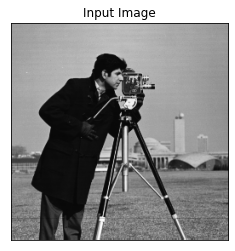

In [17]:
# STEP 2 Pick an image for filtering

# set image folder
image_folder = r'C:\Users\Metin\Desktop\EE421\Week4'

# read input image 
image_file = r'/cameraman.tiff'
image_path = image_folder + image_file
imgRGB = io.imread(image_path)

if imgRGB.ndim == 3:
    # calculate the luminance image
    x_img = my_imgLuminance(imgRGB)
else:
    x_img = imgRGB

height, width = x_img.shape
print("Image width is {} and image height is {}.".format(width, height))

# display luminance image
plt.imshow(x_img, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
plt.xticks([]), plt.yticks([])
plt.show()

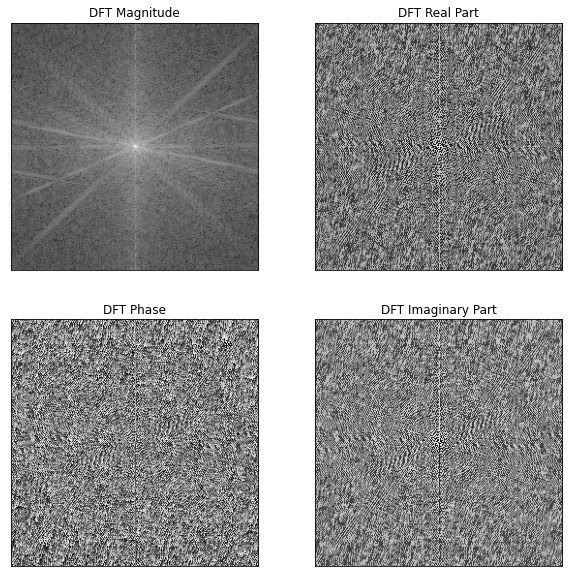

In [18]:
# STEP 4.2 Calculate the DFT of an image

# multiply the image with (-1)^(i+j) before DFT so that DFT origin is displayed at the center
x_img_shift = my_img_shift(x_img)

# calculate the 2-D DFT via SciPy's 2-D DFT function
X_img_shift = ft.fft2(x_img_shift)

# DFT magnitude 
X_img_mag = np.abs(X_img_shift)
# DFT phase (set to 0 when magnitude is infinitesmall)
X_img_phase = np.angle(X_img_shift)
X_img_phase = my_epsilon2zero(X_img_phase, X_img_mag)
# DFT real part (set to 0 when infinitesmall)
X_img_real = X_img_shift.real
X_img_real = my_epsilon2zero(X_img_real, np.abs(X_img_real))
# DFT imaginary part (set to 0 when infinitesmall)
X_img_imag = X_img_shift.imag
X_img_imag = my_epsilon2zero(X_img_imag, np.abs(X_img_imag))

# get a display friendly version for magnitude, real part and imaginary part
X_img_mag_pr = my_log_display(X_img_mag)
X_img_real_pr = my_log_display(X_img_real)
X_img_imag_pr = my_log_display(X_img_imag)

# display DFT magnitude, phase, real part, and imaginary part
# auto-stretch to 0-255 range for display
plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(X_img_mag_pr, cmap='gray')
plt.title('DFT Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(X_img_phase, cmap='gray')
plt.title('DFT Phase'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(X_img_real_pr, cmap='gray')
plt.title('DFT Real Part'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(X_img_imag_pr, cmap='gray')
plt.title('DFT Imaginary Part'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

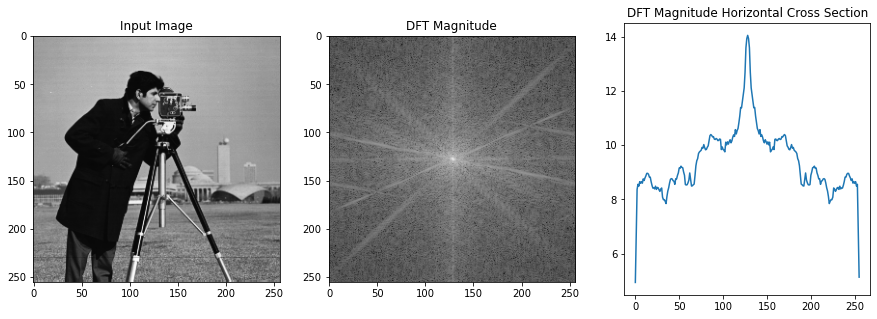

In [19]:
# display image and its DFT magnitude

# extract the horizontal center line of the DFT magnitude
X_center = X_img_mag_pr[height//2,:]
#X_center = X_img_mag_pr[:,width//2]

# smooth the center line
smt_size = 5
smt_filter = np.ones((smt_size,))
smt_filter /= smt_filter.sum()
X_center_smooth = signal.convolve(X_center, smt_filter, 'same')

# display the image, its DFT magnitude and the horizontal center line of the DFT magnitude
plt.figure(figsize=(15,5))
plt.subplot(131), plt.imshow(x_img, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
plt.subplot(132), plt.imshow(X_img_mag_pr, cmap='gray')
plt.title('DFT Magnitude')
plt.subplot(133), plt.plot(X_center_smooth)
plt.title('DFT Magnitude Horizontal Cross Section')
plt.show()
plt.close()

---------------------------------------------------------------
### **Part 4:** 1-D Convolution Theorem

#### Convolution Equation
\begin{equation}
y(m) = \sum_{k}x(k)h(m-k)
\end{equation}

#### Fourier Transforms
\begin{equation}
Y(u) = \sum_{m}y(m)e^{-j2\pi\frac{um}{M}}, ~ X(u) = \sum_{m}x(m)e^{-j2\pi\frac{um}{M}}, ~ H(u) = \sum_{m}h(m)e^{-j2\pi\frac{um}{M}}
\end{equation}

#### Fourier Domain Relationship
\begin{equation}
Y(u) = X(u) H(u)
\end{equation}

In [20]:
# STEP 2.1 Convolution in time

# 1-D signal
x = np.array([2, 1, 3, -1, 0, -2, 2, 1])

# 1-D filter kernel
h = np.array([1, 2, -1])

# 1-D convolution: via Python convolution function
y = np.convolve(x, h, 'full')

print("signal:      ", x)
print("filter:      ", h)
print("convolution: ", y)

signal:       [ 2  1  3 -1  0 -2  2  1]
filter:       [ 1  2 -1]
convolution:  [ 2  5  3  4 -5 -1 -2  7  0 -1]


In [21]:
# STEP 2.2 Multiplication in frequency

# 1-D signal
x = np.array([2, 1, 3, -1, 0, -2, 2, 1])

# 1-D filter kernel
h = np.array([1, 2, -1])

# get the size of x and h
x_size = x.size
h_size = h.size

# calculate the size of y (for "full" convolution)
y_size = x_size + h_size - 1

# append both signal and kernel with zeros so that both have the same size as y
x_a = x.copy()
h_a = h.copy()
x_a.resize(y_size)
h_a.resize(y_size)

# calculate the DFT of the signal
X = ft.fft(x_a)

# calculate the DFT of the kernel
H = ft.fft(h_a)

# multiply the DFT's of the signal and kernel to obtain the DFT of the output
Y = X * H

# calculate the inverse DFT to obtain the output signal
y_ = ft.ifft(Y)

# obtain an easy-print version of the IDFT 
y_pr = np.array2string(y_.real, formatter={'float_kind':lambda x: "%5.2f" % x})
y_pi = np.array2string(y_.imag, formatter={'float_kind':lambda x: "%5.2f" % x})

# print real and imaginary parts of the IDFT
print("signal:      ", x_a)
print("filter:      ", h_a)
print("convolution: ", y)
print("\noutput IDFT real part: \n", y_pr)
print("\noutput IDFT imaginary part: \n", y_pi)

signal:       [ 2  1  3 -1  0 -2  2  1  0  0]
filter:       [ 1  2 -1  0  0  0  0  0  0  0]
convolution:  [ 2  5  3  4 -5 -1 -2  7  0 -1]

output IDFT real part: 
 [ 2.00  5.00  3.00  4.00 -5.00 -1.00 -2.00  7.00 -0.00 -1.00]

output IDFT imaginary part: 
 [ 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00]


---------------------------------------------------------------
### **Part 5:** 2D Filtering of Images in the Fourier Domain

#### Take the DFT of input signal and filter kernel
\begin{equation}
X(u,v) = {\rm DFT}\{x(m,n)\}, ~ H(u,v) = {\rm DFT}\{h(m,n)\}
\end{equation}

#### Multiply in the Fourier domain
\begin{equation}
Y(u,v) = H(u,v) X(u,v)
\end{equation}

#### Take the inverse DFT to obtain output signal
\begin{equation}
y(m,n) = {\rm IDFT}\{Y(u,v)\}
\end{equation}

In [22]:
# my function to construct a low/high-pass rectangular uniform mask

def my_mask_Rectangle(img_shape, mask_shape, isLowPass = True):
    
    assert len(img_shape) == 2 and len(mask_shape) == 2
    assert mask_shape < img_shape
    
    # height & width of image
    hi, wi = img_shape
    
    # height & width of mask
    hm, wm = mask_shape

    if isLowPass:
        img_mask = np.zeros(img_shape)
        val = 1
    else:
        img_mask = np.ones(img_shape)
        val = 0
    
    # calculate the mask at the center
    img_mask[(hi-hm)//2:(hi+hm)//2, (wi-wm)//2:(wi+wm)//2] = val

    return img_mask

# end of function

In [23]:
# my function to construct a low/high-pass rectangular Gaussian mask

def my_mask_Gaussian(img_shape, mask_shape, std_shape, isLowPass = True):
    
    assert len(img_shape) == 2 and len(mask_shape) == 2
    assert mask_shape < img_shape
    
    # height & width of image
    hi, wi = img_shape

    # height & width of mask
    hm, wm = mask_shape
    
    # vertical and horizontal std of Gaussian 
    std_v, std_h = std_shape
    
    # vertical and horizontal Gaussian window
    win_v = signal.gaussian(hm, std_v)
    win_h = signal.gaussian(wm, std_h)
    
    # obtain the 2D Gaussian window
    win = np.outer(win_v, win_h)

    if isLowPass:
        img_mask = np.zeros(img_shape)
        val = win
    else:
        img_mask = np.ones(img_shape)
        val = 1 - win
    
    # calculate the mask at the center
    img_mask[(hi-hm)//2:(hi+hm)//2, (wi-wm)//2:(wi+wm)//2] = val

    return img_mask

# end of function

#img_mask = my_mask_Gaussian((5,5), (3,3), (1.,1.), False)

#print (img_mask)

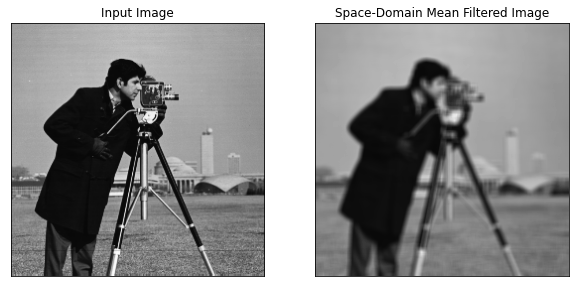

In [24]:
# STEP 5.1 Low-pass filter the image in the space domain: via mean filter

# set mean filter coefficients
size = 6
my_filter = np.ones((size, size))
my_filter /= my_filter.sum()

# 2D convolution
img_filtered_space_mean = signal.convolve2d(x_img, my_filter, mode='same', boundary='symm')

# round to nearest integer and set data type to integer
img_filtered_space_mean = my_imgTruncate(img_filtered_space_mean)

# display original and filtered images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(x_img, cmap = 'gray', vmin=0, vmax=255)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filtered_space_mean, cmap = 'gray', vmin=0, vmax=255)
plt.title('Space-Domain Mean Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

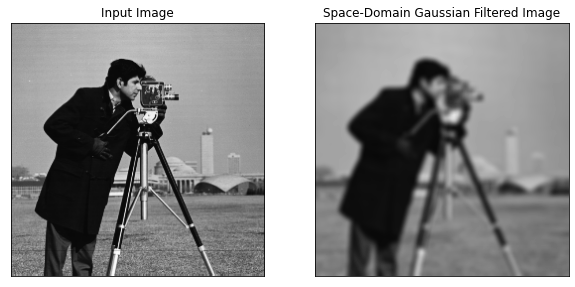

In [25]:
# STEP 5.2 Low-pass filter the image in the space domain: via Gaussian filter

# set low-pass filter size (amount of low pass filtering) 
size_filter = 6

# std of Gaussian in space domain
std_Gauss = size_filter / (2.0*math.sqrt(2.0*math.log(2.0)))

# define the mask size as a multiple of std
size_mask = 3*np.round(std_Gauss, 0).astype('int')

# make filter size odd
if size_mask%2 == 0: 
    size_mask +=1

# calculate Gaussian values
win_Gauss = signal.gaussian(size_mask, std_Gauss)

# obtain 2-D Gaussian filter
my_filter = np.outer(win_Gauss, win_Gauss)
my_filter /= my_filter.sum()

# filter the image using 2D convolution
img_filtered_space_Gauss = signal.convolve2d(x_img, my_filter, mode='same', boundary='symm')

# round to nearest integer and set data type to integer
img_filtered_space_Gauss = my_imgTruncate(img_filtered_space_Gauss)

# display original and filtered images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(x_img, cmap = 'gray', vmin=0, vmax=255)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filtered_space_Gauss, cmap = 'gray', vmin=0, vmax=255)
plt.title('Space-Domain Gaussian Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

In [26]:
# Take the DFT of the image for filtering in the Fourier Domain

# multiply the image with (-1)^(i+j) before DFT so that DFT origin is displayed at the center
# note that for this to work, both image width and height must be even
x_img_shift = my_img_shift(x_img)

# calculate the 2-D DFT via SciPy's 2-D DFT function
X_img_shift = ft.fft2(x_img_shift)

# get DFT size
height, width = X_img_shift.shape

low pass filtering factor: 6
image height and width: 256 256
DFT mask height and width: (42, 42)


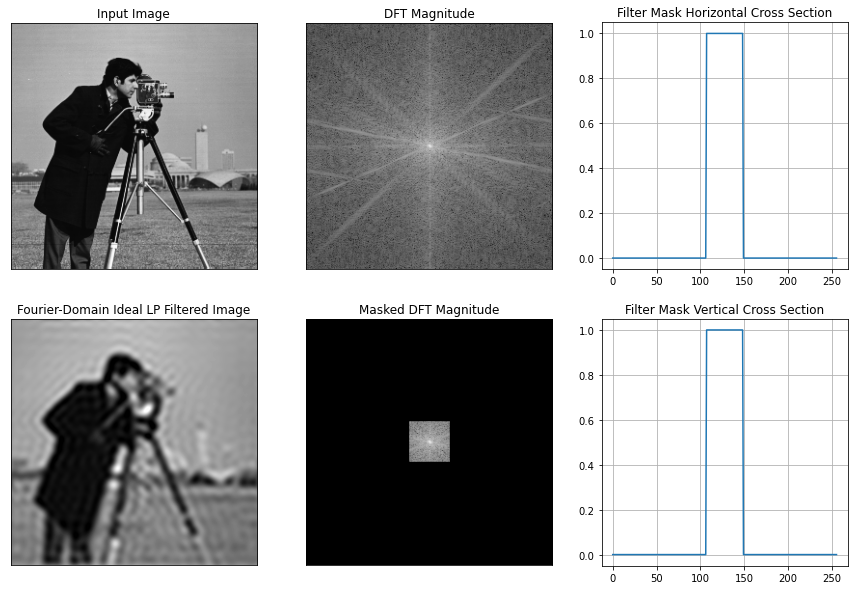

In [27]:
# STEP 5.3 Low-pass filter the image in the Fourier domain: via ideal low-pass filter

# set low-pass filter size (amount of low pass filtering) 
size_filter = 6

# define the mask size in the Fourier domain
mask_shape = (height//size_filter, width//size_filter)

# construct the low-pass filter mask
filter_mask = my_mask_Rectangle(X_img_shift.shape, mask_shape, True)

# multiply with the low-pass filter mask
X_img_masked = X_img_shift * filter_mask

# get a display friendly version for DFT magnitude
X_img_mag_pr = my_log_display(np.abs(X_img_shift))
X_img_mag_masked_pr = my_log_display(np.abs(X_img_masked))

# calculate the IDFT and take the real part
img_filtered_Fourier_mean = ft.ifft2(X_img_masked).real

# multiply the image with (-1)^(i+j) after DFT to undo the shift
img_filtered_Fourier_mean = my_img_shift(img_filtered_Fourier_mean)

# round to nearest integer and set data type to integer
img_filtered_Fourier_mean = my_imgTruncate(img_filtered_Fourier_mean)

# get min and max values for scaling during display
mag_max = X_img_mag_pr.max()
mag_min = X_img_mag_pr.min()

# print filter size
print("low pass filtering factor:", size_filter)
print("image height and width:", height, width)
print("DFT mask height and width:", mask_shape)

# display original and filtered images
plt.figure(figsize=(15,10))
plt.subplot(231), plt.imshow(x_img, cmap = 'gray', vmin=0, vmax=255)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(img_filtered_Fourier_mean, cmap = 'gray', vmin=0, vmax=255)
plt.title('Fourier-Domain Ideal LP Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(X_img_mag_pr, cmap = 'gray')
plt.title('DFT Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(X_img_mag_masked_pr, cmap = 'gray', vmin=mag_min, vmax=mag_max)
plt.title('Masked DFT Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.plot(filter_mask[height//2,:]), plt.grid()
plt.title('Filter Mask Horizontal Cross Section')
plt.subplot(236), plt.plot(filter_mask[:,width//2]), plt.grid()
plt.title('Filter Mask Vertical Cross Section')
plt.show()
plt.close()

low pass filtering factor: 6
image height and width: 256 256
DFT mask height and width: (55, 55)


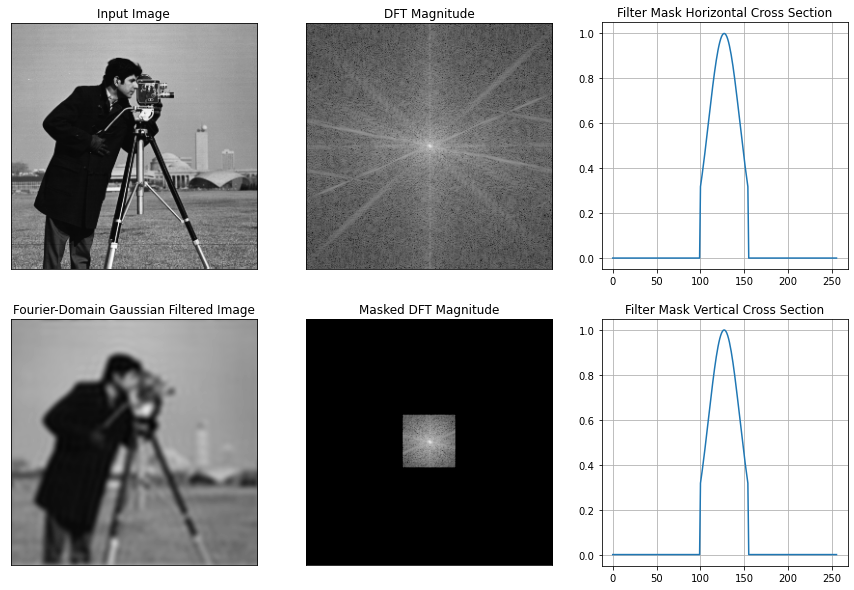

In [28]:
# STEP 5.4 Low-pass filter the image in the Fourier domain: via Gaussian low-pass filter

# set low-pass filter size (amount of low pass filtering) 
size_filter = 6

# effective mask size in the Fourier domain
delta_y = height//size_filter
delta_x = width//size_filter

# std in Fourier domain
std_y = delta_y / (2.0*math.sqrt(2.0*math.log(2.0)))
std_x = delta_x / (2.0*math.sqrt(2.0*math.log(2.0)))
std_Gauss_Fourier = (std_y, std_x)

# define the mask size as a multiple of std
size_mask_y = 3*np.round(std_y, 0).astype('int')
size_mask_x = 3*np.round(std_x, 0).astype('int')

# make filter size odd
if size_mask_y%2 == 0: 
    size_mask_y +=1
if size_mask_x%2 == 0: 
    size_mask_x +=1

# set mask_shape
mask_shape = (size_mask_y, size_mask_x)

# construct the low-pass filter mask
filter_mask = my_mask_Gaussian(X_img_shift.shape, mask_shape, std_Gauss_Fourier, True)

# multiply with the low-pass filter mask
X_img_masked = X_img_shift * filter_mask

# get a display friendly version for DFT magnitude
X_img_mag_pr = my_log_display(np.abs(X_img_shift))
X_img_mag_masked_pr = my_log_display(np.abs(X_img_masked))

# calculate the IDFT and take the real part
img_filtered_Fourier_Gauss = ft.ifft2(X_img_masked).real

# multiply the image with (-1)^(i+j) after DFT to undo the shift
img_filtered_Fourier_Gauss = my_img_shift(img_filtered_Fourier_Gauss)

# round to nearest integer and set data type to integer
img_filtered_Fourier_Gauss = my_imgTruncate(img_filtered_Fourier_Gauss)

# get min and max values for scaling during display
mag_max = X_img_mag_pr.max()
mag_min = X_img_mag_pr.min()

# print filter size
print("low pass filtering factor:", size_filter)
print("image height and width:", height, width)
print("DFT mask height and width:", mask_shape)

# display original and filtered images
plt.figure(figsize=(15,10))
plt.subplot(231), plt.imshow(x_img, cmap = 'gray', vmin=0, vmax=255)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(img_filtered_Fourier_Gauss, cmap = 'gray', vmin=0, vmax=255)
plt.title('Fourier-Domain Gaussian Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(X_img_mag_pr, cmap = 'gray')
plt.title('DFT Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(X_img_mag_masked_pr, cmap = 'gray', vmin=mag_min, vmax=mag_max)
plt.title('Masked DFT Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.plot(filter_mask[height//2,:]), plt.grid()
plt.title('Filter Mask Horizontal Cross Section')
plt.subplot(236), plt.plot(filter_mask[:,width//2]), plt.grid()
plt.title('Filter Mask Vertical Cross Section')
plt.show()
plt.close()

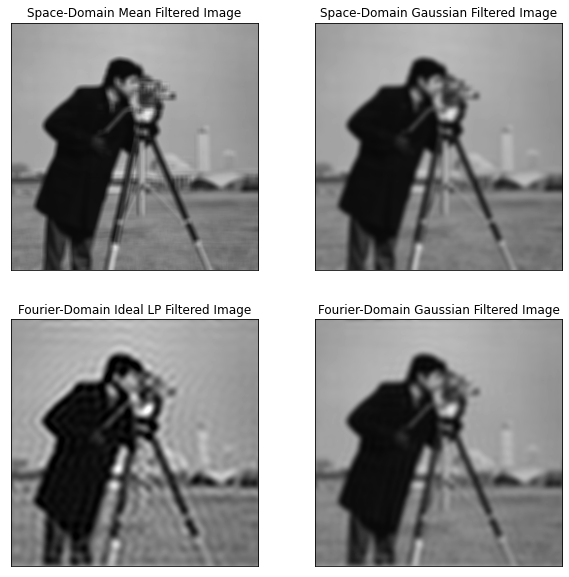

In [29]:
# compare all four results above

plt.figure(figsize=(10,10))
plt.subplot(221), plt.imshow(img_filtered_space_mean, cmap = 'gray', vmin=0, vmax=255)
plt.title('Space-Domain Mean Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_filtered_space_Gauss, cmap = 'gray', vmin=0, vmax=255)
plt.title('Space-Domain Gaussian Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_filtered_Fourier_mean, cmap = 'gray', vmin=0, vmax=255)
plt.title('Fourier-Domain Ideal LP Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img_filtered_Fourier_Gauss, cmap = 'gray', vmin=0, vmax=255)
plt.title('Fourier-Domain Gaussian Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()

high pass filtering factor: 9
image height and width: 256 256
DFT mask height and width: (256, 28)


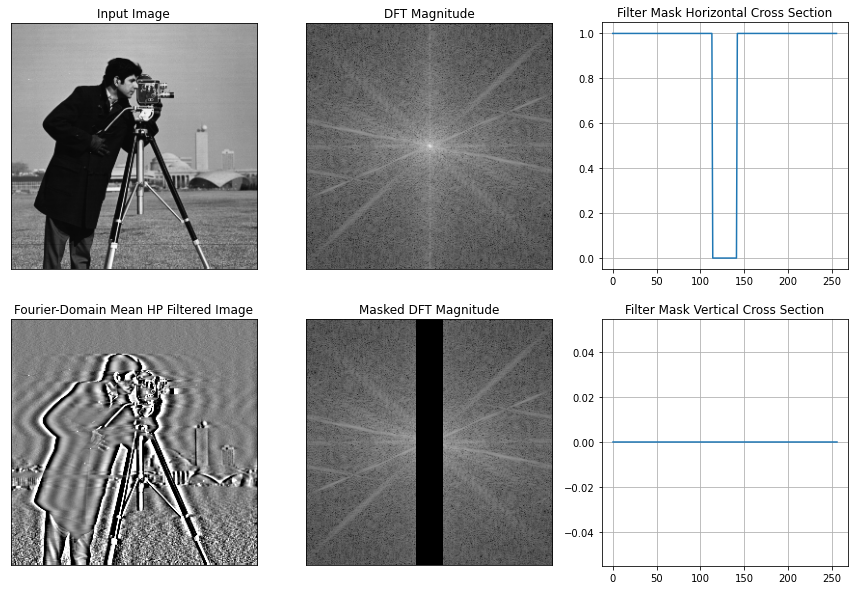

In [30]:
# STEP 5.5 High-pass filter the image in the Fourier domain: via ideal HP filter

# set high-pass filter size
size_filter = 9

# define the mask size based on DFT size and filter size
mask_shape = (height//size_filter, width//size_filter)

# construct the high-pass filter mask ("False" means HP mask)
filter_mask = my_mask_Rectangle(X_img_shift.shape, mask_shape, False)

# multiply with the filter mask
X_img_masked = X_img_shift * filter_mask

# get a display friendly version for DFT magnitude
X_img_mag_pr = my_log_display(np.abs(X_img_shift))
X_img_mag_masked_pr = my_log_display(np.abs(X_img_masked))

# calculate the IDFT and take the real part
img_filtered_Fourier_mean_HP = ft.ifft2(X_img_masked).real

# multiply the image with (-1)^(i+j) after DFT to undo the shift
img_filtered_Fourier_mean_HP = my_img_shift(img_filtered_Fourier_mean_HP)

# round to nearest integer and set data type to integer
img_filtered_Fourier_mean_HP = my_imgTruncate(img_filtered_Fourier_mean_HP * 4 + 128)

# get min and max values for scaling during display
mag_max = X_img_mag_pr.max()
mag_min = X_img_mag_pr.min()

# print filter size
print("high pass filtering factor:", size_filter)
print("image height and width:", height, width)
print("DFT mask height and width:", mask_shape)

# display original and filtered images
plt.figure(figsize=(15,10))
plt.subplot(231), plt.imshow(x_img, cmap = 'gray', vmin=0, vmax=255)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(img_filtered_Fourier_mean_HP, cmap = 'gray', vmin=0, vmax=255)
plt.title('Fourier-Domain Mean HP Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(X_img_mag_pr, cmap = 'gray')
plt.title('DFT Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(X_img_mag_masked_pr, cmap = 'gray', vmin=mag_min, vmax=mag_max)
plt.title('Masked DFT Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.plot(filter_mask[height//2,:]), plt.grid()
plt.title('Filter Mask Horizontal Cross Section')
plt.subplot(236), plt.plot(filter_mask[:,width//2]), plt.grid()
plt.title('Filter Mask Vertical Cross Section')
plt.show()
plt.close()

high pass filtering factor: 9
image height and width: 256 256
DFT mask height and width: (37, 37)


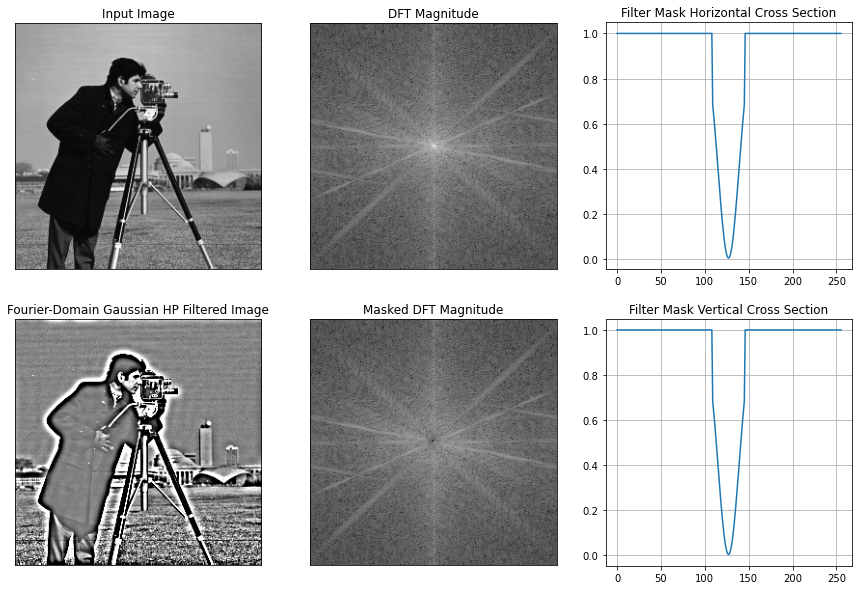

In [31]:
# STEP 5.6 High-pass filter the image in the Fourier domain: via Gaussian filter

# set low-pass filter size (amount of low pass filtering) 
size_filter = 9

# effective mask size in the Fourier domain
delta_y = height//size_filter
delta_x = width//size_filter

# std in Fourier domain
std_y = delta_y / (2.0*math.sqrt(2.0*math.log(2.0)))
std_x = delta_x / (2.0*math.sqrt(2.0*math.log(2.0)))
std_Gauss_Fourier = (std_y, std_x)

# define the mask size as a multiple of std
size_mask_y = 3*np.round(std_y, 0).astype('int')
size_mask_x = 3*np.round(std_x, 0).astype('int')

# make filter size odd
if size_mask_y%2 == 0: 
    size_mask_y +=1
if size_mask_x%2 == 0: 
    size_mask_x +=1
    
# set mask_shape
mask_shape = (size_mask_y, size_mask_x)

# construct the high-pass filter mask ("False" here means high pass)
filter_mask = my_mask_Gaussian(X_img_shift.shape, mask_shape, std_Gauss_Fourier, False)

# multiply with the filter mask
X_img_masked = X_img_shift * filter_mask

# get a display friendly version for DFT magnitude
X_img_mag_pr = my_log_display(np.abs(X_img_shift))
X_img_mag_masked_pr = my_log_display(np.abs(X_img_masked))

# calculate the IDFT and take the real part
img_filtered_Fourier_Gauss_HP = ft.ifft2(X_img_masked).real

# multiply the image with (-1)^(i+j) after DFT to undo the shift
img_filtered_Fourier_Gauss_HP = my_img_shift(img_filtered_Fourier_Gauss_HP)

# round to nearest integer and set data type to integer
img_filtered_Fourier_Gauss_HP = my_imgTruncate(img_filtered_Fourier_Gauss_HP * 4 + 128)

# get min and max values for scaling during display
mag_max = X_img_mag_pr.max()
mag_min = X_img_mag_pr.min()

# print filter size
print("high pass filtering factor:", size_filter)
print("image height and width:", height, width)
print("DFT mask height and width:", mask_shape)

# display original and filtered images
plt.figure(figsize=(15,10))
plt.subplot(231), plt.imshow(x_img, cmap = 'gray', vmin=0, vmax=255)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(234), plt.imshow(img_filtered_Fourier_Gauss_HP, cmap = 'gray', vmin=0, vmax=255)
plt.title('Fourier-Domain Gaussian HP Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(232), plt.imshow(X_img_mag_pr, cmap = 'gray')
plt.title('DFT Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(235), plt.imshow(X_img_mag_masked_pr, cmap = 'gray', vmin=mag_min, vmax=mag_max)
plt.title('Masked DFT Magnitude'), plt.xticks([]), plt.yticks([])
plt.subplot(233), plt.plot(filter_mask[height//2,:]), plt.grid()
plt.title('Filter Mask Horizontal Cross Section')
plt.subplot(236), plt.plot(filter_mask[:,width//2]), plt.grid()
plt.title('Filter Mask Vertical Cross Section')
plt.show()
plt.close()

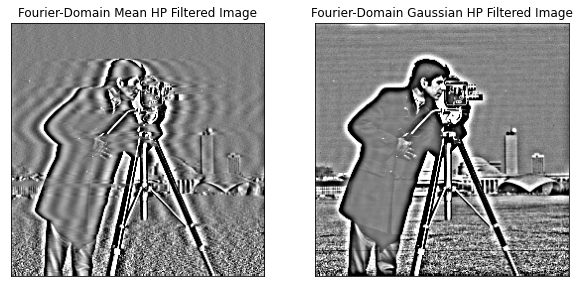

In [32]:
# compare the two results above

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(img_filtered_Fourier_mean_HP, cmap = 'gray', vmin=0, vmax=255)
plt.title('Fourier-Domain Mean HP Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filtered_Fourier_Gauss_HP, cmap = 'gray', vmin=0, vmax=255)
plt.title('Fourier-Domain Gaussian HP Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()
plt.close()